### The Mann-Whitney U test

The Mann-Whitney U test is a non-parametric statistical test used to determine whether there is a difference between two independent groups. It's often used when the data doesn't meet the assumptions required for a parametric test like the t-test.

The idea behind the Mann-Whitney U test is this: if the two compared samples come from the same population, when you mix all the observations and arrange them from smallest to largest, you would expect the observations from both samples to be randomly mixed. On the other hand, if one of the samples comes from a population with values higher or lower than the other population, when you arrange the observations, they will tend to cluster so that the observations from one sample are mostly above the other.

It's common to come across the statement that the Mann-Whitney test compares medians. This is only true when there are only changes in location while keeping the same variance and skewness. In this post, we'll explore how a change in variance affects the test.

Assumptions

The test assumes the following:

1. Ordinal or Continuous
2. Independence
3. The shapes of the distributions for the two groups are roughly the same

### Hypotheses

Given two populations, A and B, the hypotheses are as follows:

H0: The two populations are equal. That means that the probability that an observation x from population A exceeds an observation y from population B is equal to the probability that an observation from population B exceeds one from population A. So, probability equals to 0.5.

H1: The two populations are not equal, so the aforementioned probability is different from 0.5.

### Analysis

To demostrate how the heteroscedasticity between the two populations affects the result of the test, I'll create two population groups, the group1 which is a standard distribution and the group2 that is a normal distribution described by a mean of 0 and a standard deviation that ranges from 1 to 10 with a step of 1. Subsequently, I'll be conducting a power analysis for the Mann-Whitney U test using two groups. The aim is to explore how changes in standard deviations within group2 affect the statistical power. The resulting plot illustrates the dynamic relationship between test power and different standard deviations for group2, taking various sample sizes into account.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, norm

np.random.seed(123)

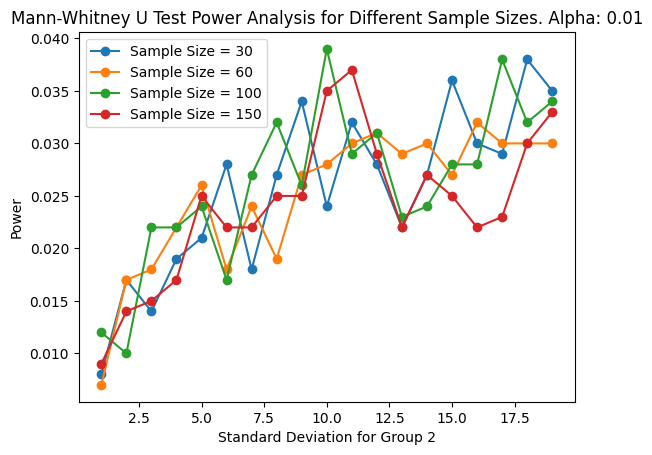

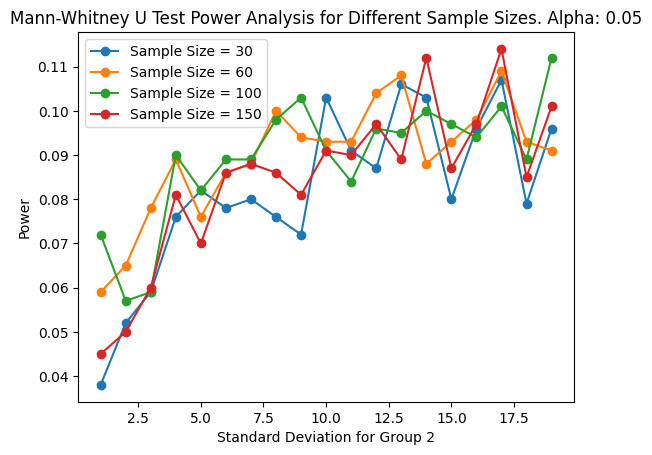

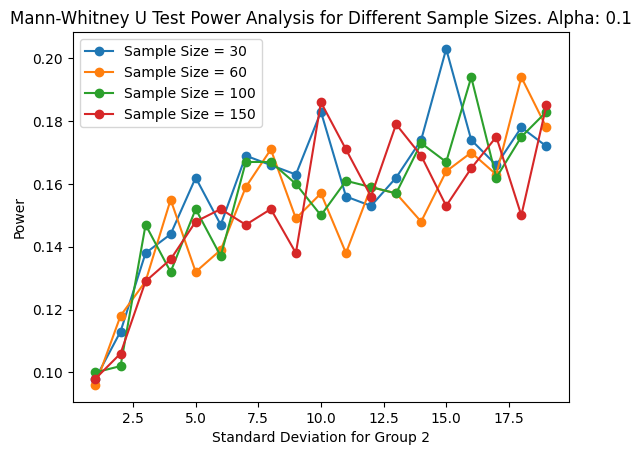

In [2]:
def calculate_power(std_dev_group2, sample_size=30, alpha=0.05, num_simulations=1000):
    reject_null = 0

    for _ in range(num_simulations):
        group1 = norm.rvs(loc=0, scale=1, size=sample_size)
        group2 = norm.rvs(loc=0, scale=std_dev_group2, size=sample_size)

        _, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

        if p_value <= alpha:
            reject_null += 1

    power = reject_null / num_simulations

    return power

std_dev_values = list(range(1, 20, 1))
sample_sizes = [30, 60, 100, 150]
alpha_values = [0.01, 0.05, 0.10]

for alpha in alpha_values:
    for sample_size in sample_sizes:
        powers = [calculate_power(std_dev, sample_size=sample_size, alpha=alpha) for std_dev in std_dev_values]
        plt.plot(std_dev_values, powers, marker='o', label=f'Sample Size = {sample_size}')

    plt.title(f'Mann-Whitney U Test Power Analysis for Different Sample Sizes. Alpha: {alpha}')
    plt.xlabel('Standard Deviation for Group 2')
    plt.ylabel('Power')
    plt.legend()
    plt.show()